# <center> <font color=darkblue> Manju_CodingAssignment3_PythonForDS_HomeLoanApproval</font> </center>    

## <center> <font color=Blue>Application to predict whether a customer is eligible for loan or not</font></center>

### Domain:
Finance and Banking.

### Context:
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customers first apply for a home loan after that company manually validates the customer eligibility for loan. Company wants to automate the loan eligibility process based on customer detail provided while filling the details online. They need a web application where a user can access their website and register, login, and enter the required details such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others for checking the eligibility for the home loan.

### Objective:
1) This is a standard supervised classification task. A classification problem where we have to predict whether a customer is eligible for loan or not based on a given set of independent variable(s). 

2) To build a Python Flask ML application where a user has to get registered by entering the username and password and login to the website and then enter their details to check whether they are eligible for loan or not.

### Dataset Information:
#### Dataset Source: https://www.kaggle.com/datasets/ssiddharth408/loan-prediction-dataset

SL. No Attribute Description 
1. Loan ID Unique Loan ID 
2. Gender Male or Female 
3. Married Applicant married (Y/N) 
4. Dependents Number of dependents 
5. Self employed Self employed (Y/N) 
6. Education Graduate/Undergraduate 
7. Applicant Income Applicant income (in dollars) 
8. Co Applicant Income Co Applicant Income (in dollars) 
9. Loan Amount Loan amount in thousands (in dollars) 
10. Loan Amount Term Term of loan in months 
11. Credit History Credit history meets guidelines Yes/No(1/0) 
12. Property area Urban/Semi Urban/Rural 
13. Loan Status (Target) Loan Approved (Y/N)


### Steps to the project:
####    1) Model Building and saving the model using Pickle 
        1.1)  Import required libraries and read the dataset.
        1.2)  Check the first few samples, shape, info of the data and try to familiarize yourself with different features.
        1.3)  Check for missing values in the dataset, if present, handle them with appropriate methods and drop redundant features.
        1.4)  Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.
        1.5)  Encode the categorical data.
        1.6)  Separate the target and independent features and split the data into train and test.
        1.7)  Build any classification model to predict the loan status of the customer and save your model using pickle.
        
####    2) Python Flask Application development
        2.1)  Creating a project and virtual environment using pycharm or visual studio code and installing the required packages.
        
        2.2)  app.py
                2.2.1) This is our main application file that is designed to call some of the implemented APIs and methods, such as connecting to the MYSQL database and creating a table for the database, and APIs such as user to register, login, enter_details, predict, and logout. 
                       a) Connect to the MYSQL database and create the class for the table. 
                           ● User(id, username, password) (can create the table in the database using mysql workbench also) 
                       b) Register: This is a register API. This should take username and password and store the details in the user database. 
                       c) Login: This API should take the username and password of registered users and successfully log them in. 
                       d) Enter Details: This API should render the ‘predict.html’ page, where the user has to enter their details to check the loan eligibility. 
                       e) Predict: This API should render the prediction results on the HTML template. 
                       f) Logout: This API should logout the user.
        2.3)  Once you run the application, it should route to the home.html page where the user has to register.        
        2.4)  The Register.html Page will look like this, the user enters the username and password.
        2.5)  The username and password will get added to the database.
        2.6)  Login.html page will look like this, only a registered user with a correct password can be logged in.
        2.7)  Once the user has logged in, the predict.html page will be displayed where the user needs to enter the details to get the loan eligibility status.
        2.8)  Then the application will predict the loan eligibility based on the given features, and if the user clicks on logout, it will redirect to the login page.


### 1) Model Building and saving the model using Pickle

#### 1.1. Import required libraries

In [1]:
# Import libraries
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings

In [2]:
warnings.filterwarnings('ignore')

##### Load the dataset

In [3]:
#Loading the dataset
loan = pd.read_csv('loan_approval_data.csv')

In [4]:
loan

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,lp002978,female,no,0.0,graduate,no,2900,0.0,71.0,360.0,1.0,rural,y
610,lp002979,male,yes,3.0,graduate,no,4106,0.0,40.0,180.0,1.0,rural,y
611,lp002983,male,yes,1.0,graduate,no,8072,240.0,253.0,360.0,1.0,urban,y
612,lp002984,male,yes,2.0,graduate,no,7583,0.0,187.0,360.0,1.0,urban,y


In [5]:
loan.head

<bound method NDFrame.head of       loan_id  gender married  dependents     education self_employed  \
0    lp001002    male      no         0.0      graduate            no   
1    lp001003    male     yes         1.0      graduate            no   
2    lp001005    male     yes         0.0      graduate           yes   
3    lp001006    male     yes         0.0  not graduate            no   
4    lp001008    male      no         0.0      graduate            no   
..        ...     ...     ...         ...           ...           ...   
609  lp002978  female      no         0.0      graduate            no   
610  lp002979    male     yes         3.0      graduate            no   
611  lp002983    male     yes         1.0      graduate            no   
612  lp002984    male     yes         2.0      graduate            no   
613  lp002990  female      no         0.0      graduate           yes   

     applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0               5849

#### 1.2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [6]:
# display the first 5 rows of the dataframe. 
loan.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
499,lp002602,male,no,0.0,graduate,no,6283,4416.0,209.0,360.0,0.0,rural,n
359,lp002160,male,yes,3.0,graduate,no,5167,3167.0,200.0,360.0,1.0,semiurban,y
293,lp001945,female,no,NaN,graduate,no,5417,0.0,143.0,480.0,0.0,urban,n
35,lp001106,male,yes,0.0,graduate,no,2275,2067.0,NaN,360.0,1.0,urban,y
611,lp002983,male,yes,1.0,graduate,no,8072,240.0,253.0,360.0,1.0,urban,y


In [7]:
# Check the shape of the dataset.¶
loan.shape

(614, 13)

In [8]:
#Check the info of the dataset.¶
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [9]:
loan.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### 1.3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.

In [10]:
loan.shape

(614, 13)

In [11]:
# Is duplicates avaialble 
loan.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [12]:
# Sum of duplicate
loan.duplicated().sum()

0

There are no duplicates

In [13]:
# Check for missing values in each column of the dataset. If it exists, impute them with appropriate methods.

# Missing Values Check
print("The existence of missing values in each column:")
loan.isnull().any()

The existence of missing values in each column:


loan_id              False
gender                True
married               True
dependents            True
education            False
self_employed         True
applicantincome      False
coapplicantincome    False
loanamount            True
loan_amount_term      True
credit_history        True
property_area        False
loan_status          False
dtype: bool

The columns "gender,married,dependents,self_employed,loanamount,loan_amount_term,credit_history" are having the missing values.

In [14]:
# Count missing value
loan.isna().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [15]:
df=loan.copy()

In [16]:
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,lp002978,female,no,0.0,graduate,no,2900,0.0,71.0,360.0,1.0,rural,y
610,lp002979,male,yes,3.0,graduate,no,4106,0.0,40.0,180.0,1.0,rural,y
611,lp002983,male,yes,1.0,graduate,no,8072,240.0,253.0,360.0,1.0,urban,y
612,lp002984,male,yes,2.0,graduate,no,7583,0.0,187.0,360.0,1.0,urban,y


In [17]:
# Apply mode & impute
# "gender,married,dependents,self_employed,loanamount,loan_amount_term,credit_history" 
cols = ['gender','married','dependents','self_employed','loanamount','loan_amount_term','credit_history']

loan[cols]=loan[cols].fillna(loan.mode().iloc[0])
loan.isna().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [18]:
loan

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,120.0,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,lp002978,female,no,0.0,graduate,no,2900,0.0,71.0,360.0,1.0,rural,y
610,lp002979,male,yes,3.0,graduate,no,4106,0.0,40.0,180.0,1.0,rural,y
611,lp002983,male,yes,1.0,graduate,no,8072,240.0,253.0,360.0,1.0,urban,y
612,lp002984,male,yes,2.0,graduate,no,7583,0.0,187.0,360.0,1.0,urban,y


Imputed null vlues

In [19]:
# Sum of duplicate
loan.duplicated().sum()

0

##### Drop redundant features for the analysis.

In [20]:
loan.shape

(614, 13)

In [21]:
loan.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [22]:
col = ['loan_id']
loan = loan.drop(columns=col, axis=1)

# Examine the shape of the DataFrame (again)
print(loan.shape)

(614, 12)


In [23]:
loan

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,120.0,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,female,no,0.0,graduate,no,2900,0.0,71.0,360.0,1.0,rural,y
610,male,yes,3.0,graduate,no,4106,0.0,40.0,180.0,1.0,rural,y
611,male,yes,1.0,graduate,no,8072,240.0,253.0,360.0,1.0,urban,y
612,male,yes,2.0,graduate,no,7583,0.0,187.0,360.0,1.0,urban,y


#### 1.4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [24]:
# get categorical columns
categ_cols=loan.select_dtypes(include=[np.object])
categ_cols.columns

Index(['gender', 'married', 'education', 'self_employed', 'property_area',
       'loan_status'],
      dtype='object')

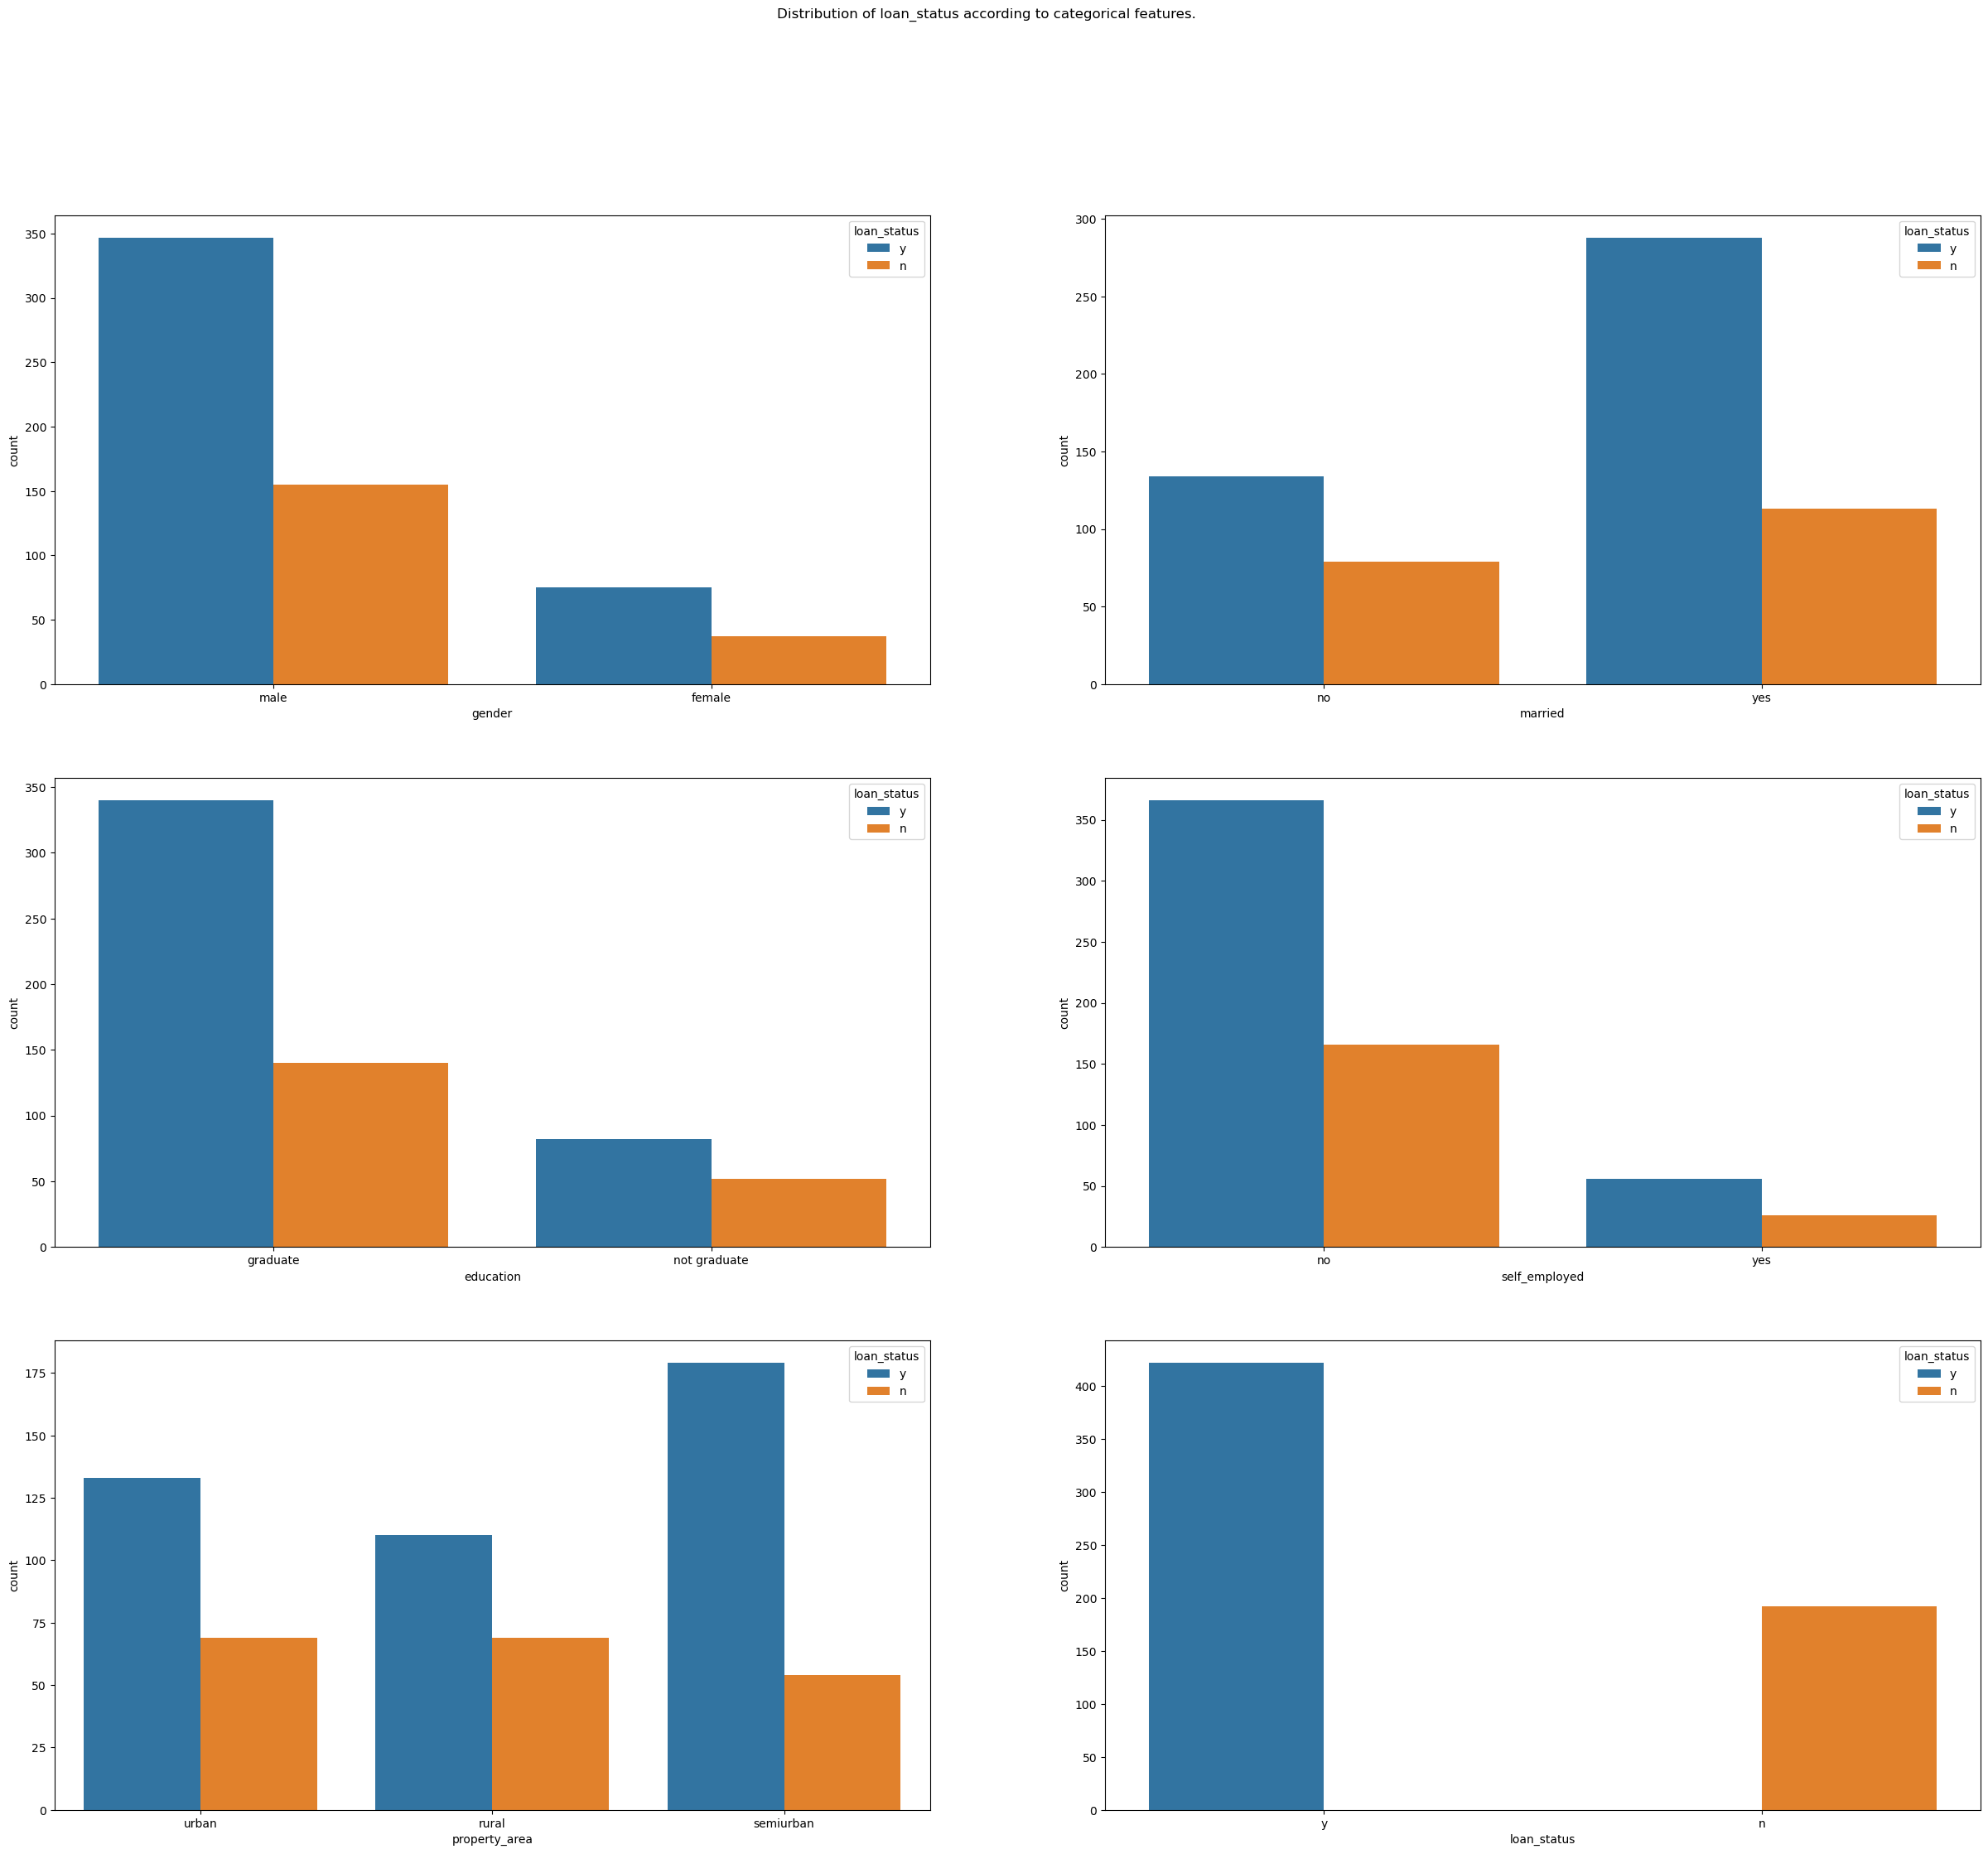

In [25]:
# Based on categorical columns distribution
plt.figure(figsize=(30,25))
for i,feature in enumerate(categ_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=feature,hue='loan_status',data=loan)
plt.suptitle("Distribution of loan_status according to categorical features.")
plt.savefig("DistributionLoanStatusCateg.png")

Based on the gender catergorical feature analyis based on the loan_status ;
Males , Married , graduates , non-self employed , who has property at semiurban are most eligible according loan_status.

#### 1.5. Encode the categorical data.

In [26]:
loan_encode=loan.copy()

In [27]:
#Get list of categorical variables
s = (loan_encode.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['gender', 'married', 'education', 'self_employed', 'property_area', 'loan_status']


In [28]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    loan_encode[i]=loan_encode[[i]].apply(LE.fit_transform)

In [29]:
loan_encode

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


#### 1.6. Separate the target and independent features and split the data into train and test.

In [30]:
loan_encode.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [31]:
# Store the target column loan_status in the y variable and the rest of the columns in the X variable.
sdf=loan_encode
x=sdf.drop(['loan_status'],axis=1)
print('X values : ')
print(x)
y=loan_encode[['loan_status']]
print('-------------------')
print('Y values : ')
print(y)


X values : 
     gender  married  dependents  education  self_employed  applicantincome  \
0         1        0         0.0          0              0             5849   
1         1        1         1.0          0              0             4583   
2         1        1         0.0          0              1             3000   
3         1        1         0.0          1              0             2583   
4         1        0         0.0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0         0.0          0              0             2900   
610       1        1         3.0          0              0             4106   
611       1        1         1.0          0              0             8072   
612       1        1         2.0          0              0             7583   
613       0        0         0.0          0              1             4583   

     coapplicantincome  loanamount  loa

In [32]:
# Grouped
x['credit_history'].value_counts()

1.0    525
0.0     89
Name: credit_history, dtype: int64

##### Split the data into train and test.

In [33]:
# Split the dataset into two parts (i.e. 70% train and 30% test)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [34]:
# print the shape of the train and test data
x_train.shape

(429, 11)

In [35]:
# print the shape of the train and test data
x_test.shape

(185, 11)

In [36]:
# print the shape of the train and test data
y_train.shape

(429, 1)

In [37]:
# print the shape of the train and test data
y_test.shape

(185, 1)

#### 1.7.  Build any classification model to predict the loan status of the customer and save your model using pickle.

In [38]:
# Function Which can take the model and data as inputs.
def fit_n_predict(model,x_train,x_test,y_train,y_test):
    # Fits the model with the train data.
    model.fit(x_train,y_train)
    
    #Makes predictions on the test set.
    pred=model.predict(x_test)
    
    # Calculates the Accuracy Score.
    accuracy=accuracy_score(y_test,pred)
    
    # Returns the Accuracy Score.
    return accuracy

In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier()
rs=pd.DataFrame(columns=['Accuracy'])
lr=LogisticRegression()

rs.loc['Random Forest']=fit_n_predict(rf,x_train,x_test,y_train,y_test)

rs

,Accuracy
Random Forest,0.767568


##### Create a pickle file with an extension as .pkl

In [40]:
import pickle
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))


In [41]:
df = pd.read_pickle('model.pkl')
df

RandomForestClassifier()

### 2. Python Flask Application development

#### 2.1. Creating a project and virtual environment using pycharm or visual studio code and installing the required packages

Attached the screen prints

### b) Create app.py file and write the predict function

Attached the screen prints

### Happy Learning :)